# Week 4 - Partial Least Squares Regression

In [1]:
import scipy as sp, numpy as np
from scipy.io import loadmat
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

data = loadmat('./wk4_Cosgrove-data.mat', squeeze_me=True)['s']

X = data['X'].item() # the untransformed data matrix (66x102)
Y = data['Y'].item() # the untransformed LDH release at 48hours. (66x1)
Y = Y[:, 4]
phosphoproteins = data['phosphoproteins'].item() # names of phosphoproteins
conditions = data['conditions'].item() # cell array of the 66 conditions
drugList = data['drugList'].item() # description of the drugs used in each of the 66 conditions
drugListToxic = data['drugListToxic'].item() # binary value corresponding to whether drugList[i] is toxic
drugs = data['drugs'].item() # binary matrix mapping which measurements correspond to a drug treatment in drugList
cytokineList = data['cytokineList'].item() # cell array of cytokine treatments
ind4pProtein = data['ind4pProtein'].item() # the column indices corresponding to measurements of the 4 phosphoprotein subset

In [2]:
#print(X)
#print(X.shape)
#print(X.dtype)
#print(Y)
#print(Y.shape)
#print(Y.dtype)

#### (1) Perform PLSR on the matrixes X and Y. Plot the percent variance explained. How many principle components do you need for each to explain 90% of the variance? Discuss your findings.

Hint: Be sure to normalize each dataset as needed for the analysis.

In [3]:
import scipy
from scipy import stats

X_zscored = scipy.stats.mstats.zscore(X, axis=0)
Y_zscored = scipy.stats.zscore(Y)

In [4]:
#print(X_zscored)
#print(X_zscored.shape)
#print(X_zscored.dtype)
#print(Y_zscored)
#print(Y_zscored.shape)
#print(Y_zscored.dtype)

In [5]:
def one_minus_ratio(A_model, A_observed):
    # np.subtract ~ element-wise subtraction 
    # np.square ~ element-wise squaring
    # np.sum ~ sum of all elements
    
    sum_of_squared_differences = np.sum(np.square(np.subtract(A_model,A_observed)))
    squared_observed = np.sum(np.square(A_observed))
    
    return(1-(sum_of_squared_differences/squared_observed))

# tests for function: one_minus_ratio
assert(one_minus_ratio(X_zscored,X_zscored)==1)
assert(one_minus_ratio(Y_zscored,Y_zscored)==1)
assert(one_minus_ratio(X_zscored,X)!=1)
assert(one_minus_ratio(Y_zscored,Y)!=1)

def R_2(A_scores, A_loadings, A_observed):
    # creates A_model for input into one_minus_ratio function
    A_loadings_transpose = np.ndarray.transpose(A_loadings)
    A_model = np.dot(A_scores, A_loadings_transpose)
    
    return(one_minus_ratio(A_model, A_observed))

90.6% of the variance in X has been explained at 18 principal components.
91.19% of the variance in X has been explained at 19 principal components.
91.96% of the variance in X has been explained at 20 principal components.
92.54% of the variance in X has been explained at 21 principal components.
93.14% of the variance in X has been explained at 22 principal components.
93.82% of the variance in X has been explained at 23 principal components.
94.03% of the variance in X has been explained at 24 principal components.
94.52% of the variance in X has been explained at 25 principal components.
95.02% of the variance in X has been explained at 26 principal components.
95.34% of the variance in X has been explained at 27 principal components.
95.82% of the variance in X has been explained at 28 principal components.
96.06% of the variance in X has been explained at 29 principal components.
96.43% of the variance in X has been explained at 30 principal components.
96.74% of the variance in 

C:\Users\Shak3\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:287: UserWarning: Y residual constant at iteration 65
  warnings.warn('Y residual constant at iteration %s' % k)


99.99% of the variance in X has been explained at 77 principal components.
99.99% of the variance in X has been explained at 78 principal components.
99.99% of the variance in X has been explained at 79 principal components.
99.99% of the variance in X has been explained at 80 principal components.
99.99% of the variance in X has been explained at 81 principal components.
99.99% of the variance in X has been explained at 82 principal components.
99.99% of the variance in X has been explained at 83 principal components.
99.99% of the variance in X has been explained at 84 principal components.
99.99% of the variance in X has been explained at 85 principal components.
99.99% of the variance in X has been explained at 86 principal components.
99.99% of the variance in X has been explained at 87 principal components.
99.99% of the variance in X has been explained at 88 principal components.
99.99% of the variance in X has been explained at 89 principal components.
99.99% of the variance in

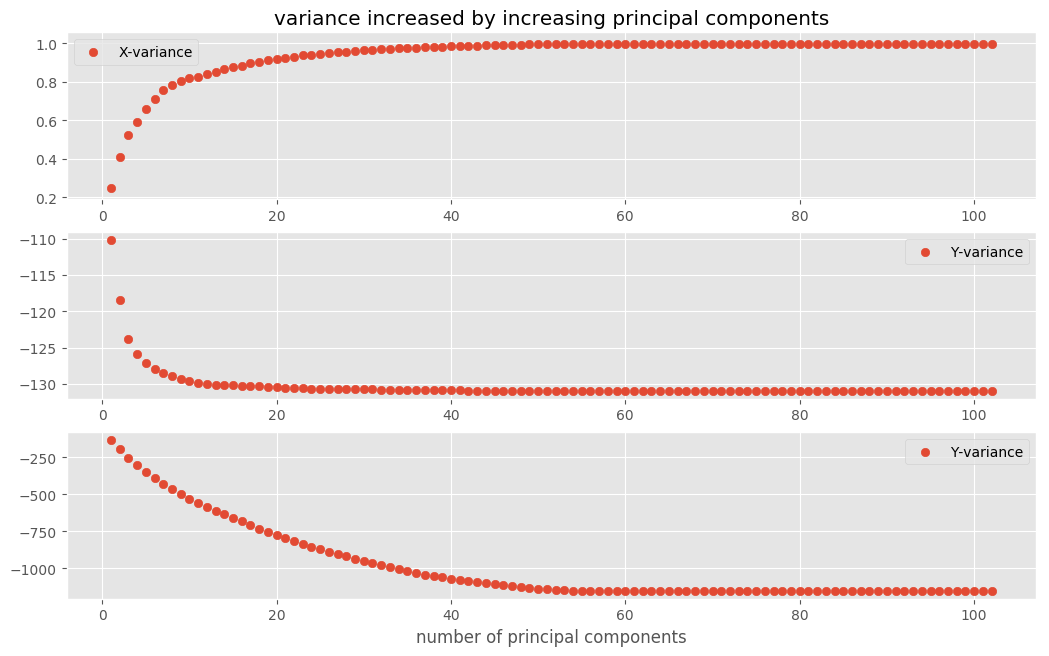

In [6]:
from sklearn.cross_decomposition import PLSRegression

R_2_X_holder_using_function_I_wrote= [] # holds R_squared values for variance in X defined by function I wrote
R_2_Y_holder_lazy = [] # holds R_squared values for variance in Y given by PLSR
R_2_Y_holder_using_function_I_wrote = [] # # holds R_squared values for variance in Y defined by function I wrote

max_number_of_pc = 102

for i in range(max_number_of_pc):
    #print("{} principal components.".format(i+1))
    pls= PLSRegression(n_components=(i+1), max_iter=500)
    pls.fit(X_zscored,Y_zscored)
        
    R_2_X_holder_using_function_I_wrote.append(R_2(pls.x_scores_, pls.x_loadings_, X_zscored))
    if R_2_X_holder_using_function_I_wrote[-1] >= 0.9:
        print("{}% of the variance in X has been explained at {} principal components.".format((round(100*R_2_X_holder_using_function_I_wrote[-1], 2)), (i+1)))
    
    Y_model = pls.predict(X_zscored)
    R_2_Y_holder_lazy.append(one_minus_ratio(Y_model, Y_zscored))
    if R_2_Y_holder_lazy[-1] >= 0.9:
        print("{}% of ]the variance in Y has been explained at {} principal components.".format((round(100*R_2_Y_holder_lazy[-1], 2)), (i+1)))
    
    R_2_Y_holder_using_function_I_wrote.append(R_2(pls.y_scores_, pls.y_loadings_, Y_zscored))
    if R_2_Y_holder_using_function_I_wrote[-1] >= 0.9:
        print("{}% of ]the variance in Y has been explained at {} principal components.".format((round(100*R_2_Y_holder_using_function_I_wrote[-1], 2)), (i+1)))

    
plt.figure(1, figsize=(12.5, 7.5), dpi=100)

plt.subplot(311)
plt.title("variance increased by increasing principal components")
plt.scatter(np.arange(1,max_number_of_pc+1), R_2_X_holder_using_function_I_wrote, label="X-variance")
plt.legend()

plt.subplot(312)
plt.scatter(np.arange(1,max_number_of_pc+1), R_2_Y_holder_lazy, label="Y-variance")
plt.legend()

plt.subplot(313)
plt.scatter(np.arange(1,max_number_of_pc+1), R_2_Y_holder_using_function_I_wrote, label="Y-variance")
plt.xlabel("number of principal components")
plt.legend()

plt.show()

#### (2) Recreate the Figure S2A plot from Cosgrove et al. supplementary information. This is the PLSR scores plot (for PC1 and PC2), with toxic drugs colored according to the drug type and all other drugs are not colored. Use the drugList, drugListToxic to identify these categories.

In [7]:
# Answer

#### (3) Create the loadings plot corresponding to (2). Interpret the results shown on the plot.

In [8]:
# Answer.

#### (4) Recreate a 4-principle component model using PLSR with just the final 4 phosphoprotein model. Plot predicted LDH versus observed LDH for this model. Report the model fitness (R^2). Define here how you are calculating R^2.

In [9]:
# Answer

#### (5) Cosgrove reported that the 4-phosphoprotein model chosen, based on VIP scores, accurately reproduces LDH release. To determine if the VIP score improved the selection of reduced parameter sets, choose 4 phosphoproteins at random (keeping all measurements per phosphoprotein) and calculate the fitness by calculating the R^2 value for each set. Repeat this 100 times and calculate the model fitness (R^2) and plot the histogram of these values. Do you think the VIP-score based model reduction is better than random selections? Why/ why not? Do you need to keep track of the 100 subsets chosen in your random trials to prevent choosing the same subset? Why/why not?

In [10]:
# Answer

#### (6) Cosgrove et al. Discusses their method for model validation using leave- one-out cross-validation. Calculate all LDH predictions for leave-one-out cross-validation and calculate the R^2 value for the resulting yfit values. What is the R^2 value? Why do you think it’s important to perform cross-validation?

In [11]:
# Answer

#### (7) Now, instead of performing LOOCV, let's perform leave-one-cytokine-out cross-validation. That is, one cytokine at a time, leave out all the data for the `NoCyt`, `IL-1`, `LPS`, `TNF`, `IL-6`, or `Mix` conditions.

Hint: Look at `sklearn.model_selection.LeaveOneGroupOut`.

How does this affect your cross-validation? How do the two approaches here differ? When might each be most appropriate?

In [12]:
# Answer